In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [157]:
# Import CTGAN Synthetic data
synthetic_CTGAN = pd.read_csv("syn.csv", encoding="UTF-8")
synthetic_CTGAN = synthetic_CTGAN.drop('Unnamed: 0', axis=1)
synthetic_CTGAN.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,Total
0,Water,NaN,61,106,22,40,60,44,3,False,Basic,333
1,Dark,Flying,99,92,54,26,64,135,1,False,Stage2,470
2,Grass,NaN,62,46,42,76,101,47,5,False,Basic,374
3,Water,Flying,70,104,86,11,120,71,2,False,Stage1,462
4,Ground,NaN,35,77,17,20,22,5,5,False,Basic,176


In [158]:
# Import Gaussian Synthetic data
synthetic_Gaussian = pd.read_csv("Gaussian_Pokemon.csv", encoding="UTF-8")
synthetic_Gaussian = synthetic_Gaussian.drop('Name', axis=1)
synthetic_Gaussian.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,Normal,Steel,73,93,91,106,92,71,5,False,Stage1
1,Water,NaN,43,43,34,31,31,32,1,False,Basic
2,Ice,Flying,39,39,18,44,36,61,3,True,Basic
3,Fire,NaN,118,103,129,100,84,71,1,False,Stage1
4,Electric,NaN,69,65,62,68,53,89,3,False,Basic


In [159]:
# Import tensorflow Model Synthetic data
synthetic_tf = pd.read_csv("data\\TF_Pokemon.csv", encoding="UTF-8")
synthetic_tf.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Generation,Type 1,Type 2,Evolution,Total
0,44.0,47.0,43.0,40.0,44.0,39.0,False,3,Grass,Fairy,Stage2,257.0
1,45.0,50.0,55.0,40.0,99.0,39.0,False,3,)Normal,Flying,Basic,328.0
2,95.0,111.0,105.0,106.0,100.0,97.0,False,6,Grass,Psychic,Mega,614.0
3,95.0,111.0,105.0,55.0,100.0,39.0,True,1,Fire,Ghost,Stage1,505.0
4,44.0,47.0,43.0,40.0,44.0,39.0,False,3,Bug,Rock,Basic,257.0


In [160]:
# Import real data
df = pd.read_csv("data\\pokemon_train_set.csv")
df = df.drop('Name', axis=1)
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,Grass,Poison,45,49,49,65,65,45,1,False,Basic
1,Grass,Poison,60,62,63,80,80,60,1,False,Stage1
2,Grass,Poison,80,82,83,100,100,80,1,False,Stage2
3,Grass,Poison,80,100,123,122,120,80,1,False,Mega
4,Fire,NaN,39,52,43,60,50,65,1,False,Basic


In [161]:

replace_dict = {
    'Basic':0,
    'Stage1':1,
    'Stage2':2,
    'Mega':3
}

synthetic_tf['Evolution'] = synthetic_tf['Evolution'].replace(replace_dict)
synthetic_CTGAN['Evolution'] = synthetic_CTGAN['Evolution'].replace(replace_dict)
df['Evolution'] = df['Evolution'].replace(replace_dict)

C:\Users\Lisa\AppData\Local\Temp\ipykernel_19212\3261416247.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  synthetic_tf['Evolution'] = synthetic_tf['Evolution'].replace(replace_dict)
C:\Users\Lisa\AppData\Local\Temp\ipykernel_19212\3261416247.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  synthetic_CTGAN['Evolution'] = synthetic_CTGAN['Evolution'].replace(replace_dict)
C:\Users\Lisa\AppData\Local\Temp\ipykernel_19212\3261416247.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a

In [162]:
# Adding Total column for real and synthetic data
df['Total'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# synthetic_CTGAN
synthetic_CTGAN['Total'] = synthetic_CTGAN[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# synthetic_tf
synthetic_tf['Total'] = synthetic_tf[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)
synthetic_Gaussian['Total'] = synthetic_Gaussian[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

In [164]:
df_std = df.std(numeric_only=True)
synthetic_std = synthetic_tf.std(numeric_only=True)
gaussian_std = synthetic_Gaussian.std(numeric_only=True)
ctgan_std = synthetic_CTGAN.std(numeric_only=True)
std_df = pd.DataFrame({
    'Real': df_std,
    'Synthetic_TF': synthetic_std,
    'Synthetic_Gaussian': gaussian_std,
    'Synthetic_CTGAN': ctgan_std
})

mean_df = pd.DataFrame({
    'Real': df.mean(numeric_only=True),
    'Synthetic_TF': synthetic_tf.mean(numeric_only=True),
    'Synthetic_Gaussian': synthetic_Gaussian.mean(numeric_only=True),
    'Synthetic_CTGAN': synthetic_CTGAN.mean(numeric_only=True)
})

combined_df = pd.concat([std_df.add_suffix('_std'), mean_df.add_suffix('_median')], axis=1)

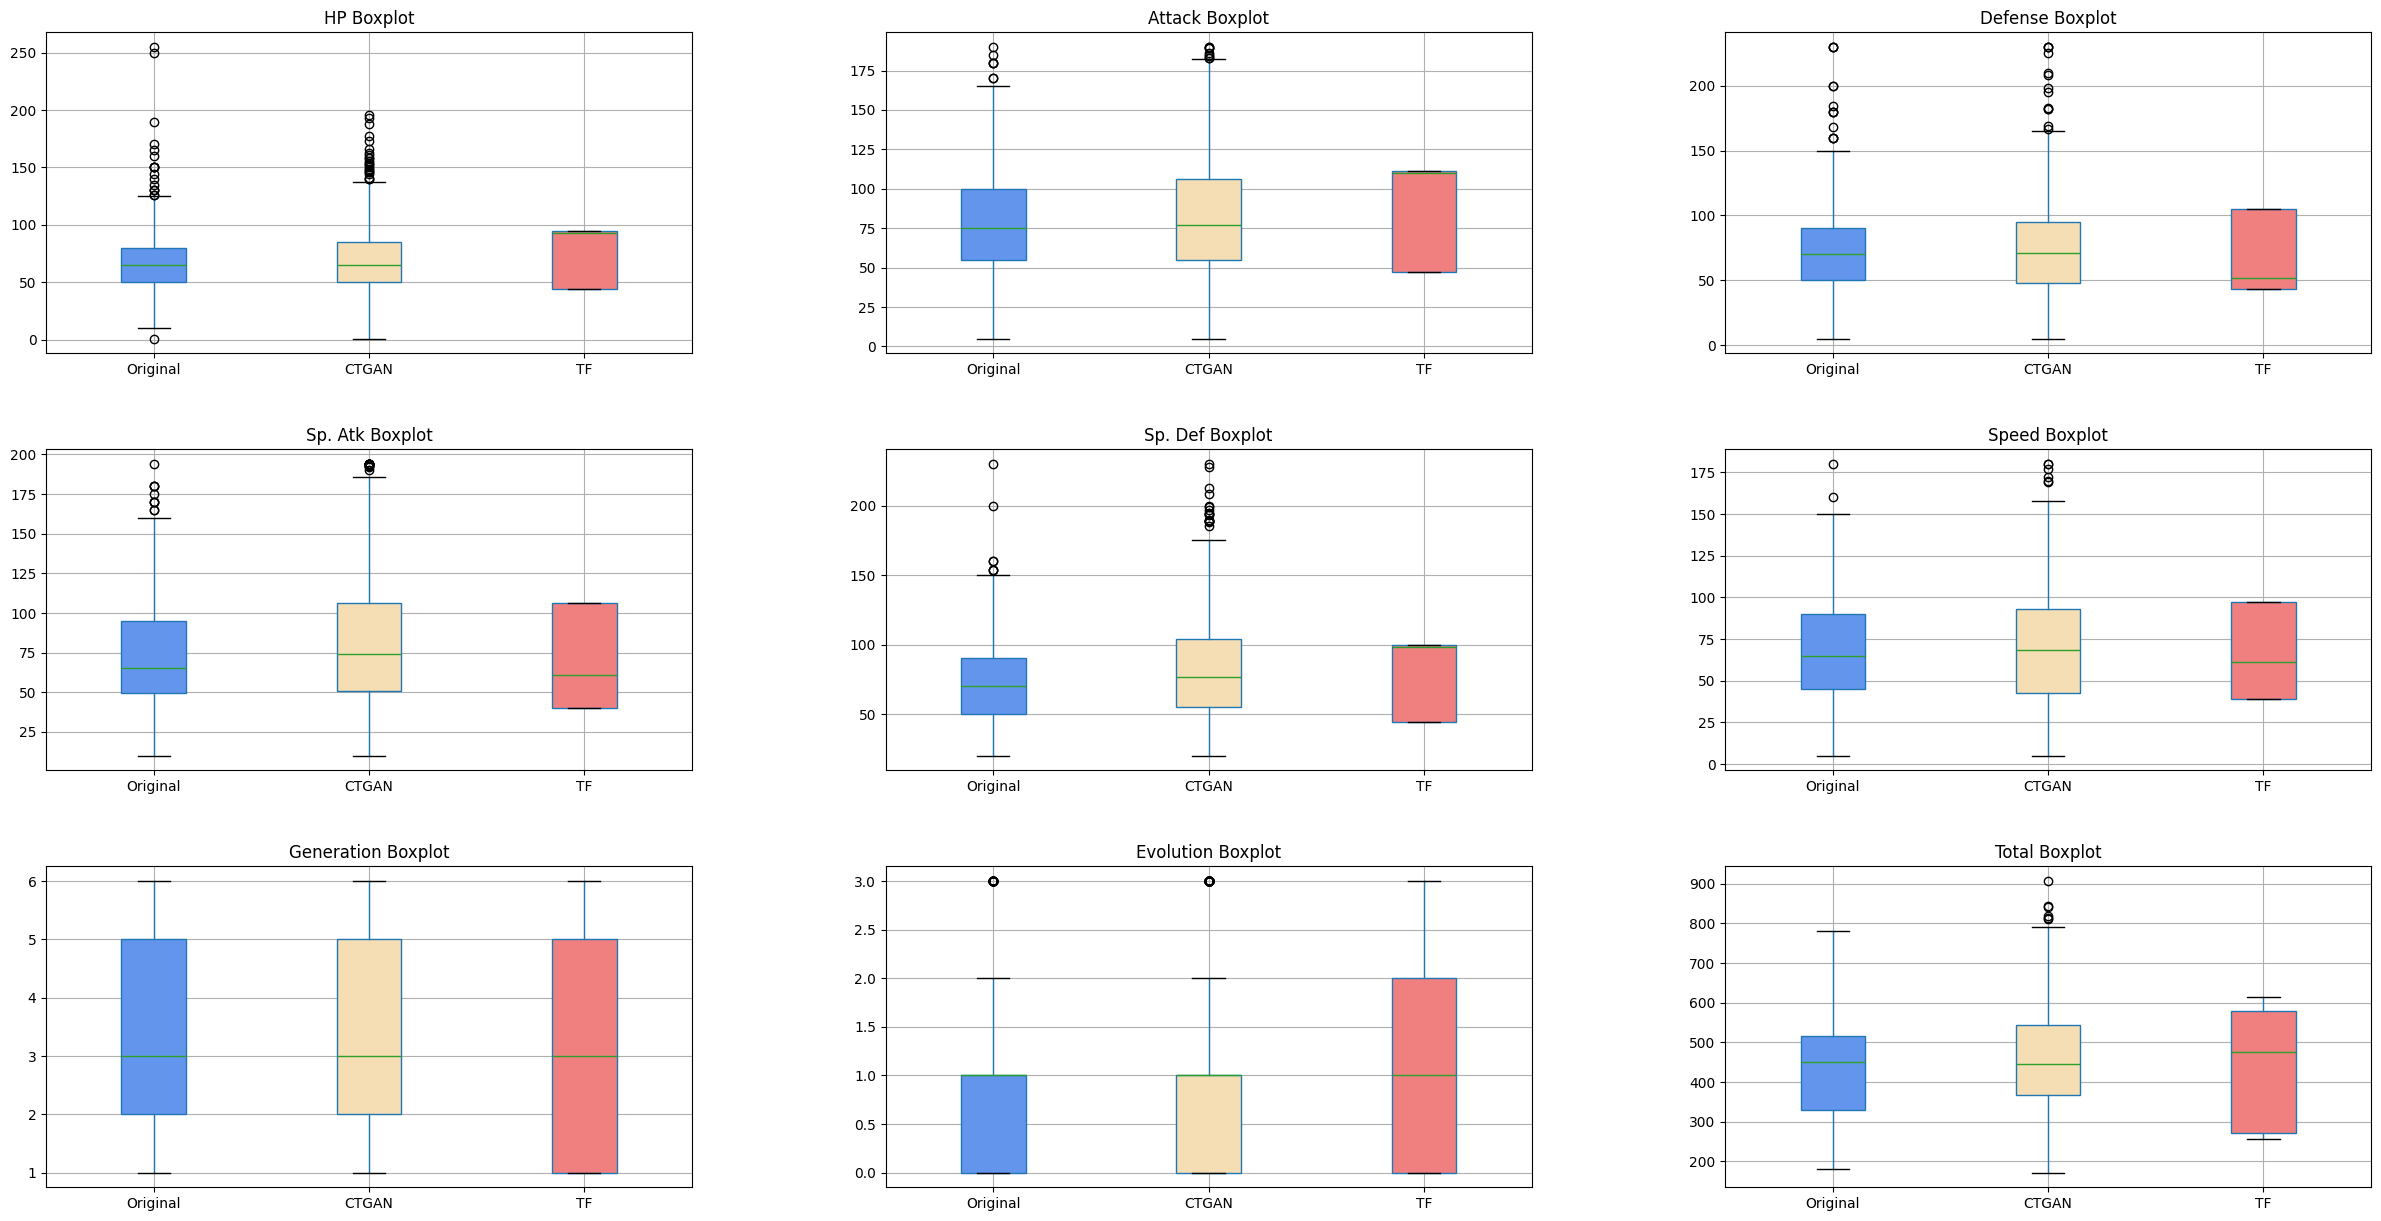

In [197]:
additional_datasets = [df, synthetic_CTGAN, synthetic_tf]   
numeric_cols = df.select_dtypes(include=[int, float]) 
# Plot settings 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))  
colors = ['cornflowerblue', 'wheat', 'lightcoral'] 
axes = axes.flatten() 
plt.subplots_adjust(wspace=0.3, hspace=0.3) 
 
# Plot each attribute in its own subplot 
for i, stat in enumerate(numeric_cols): 
     
    combined_data = pd.concat([ds[stat] for ds in additional_datasets], axis=1) 
    combined_data.columns = ['Original', 'CTGAN', 'TF'] 
     
    # Create the boxplot 
    
    bp = combined_data.boxplot(ax=axes[i], patch_artist=True, return_type='dict') 
 
    # fill with colors 
    for patch, color in zip(bp['boxes'], colors): 
        patch.set_facecolor(color) 
    axes[i].set_title(stat + ' Boxplot')
 
plt.show()
# Show the plot

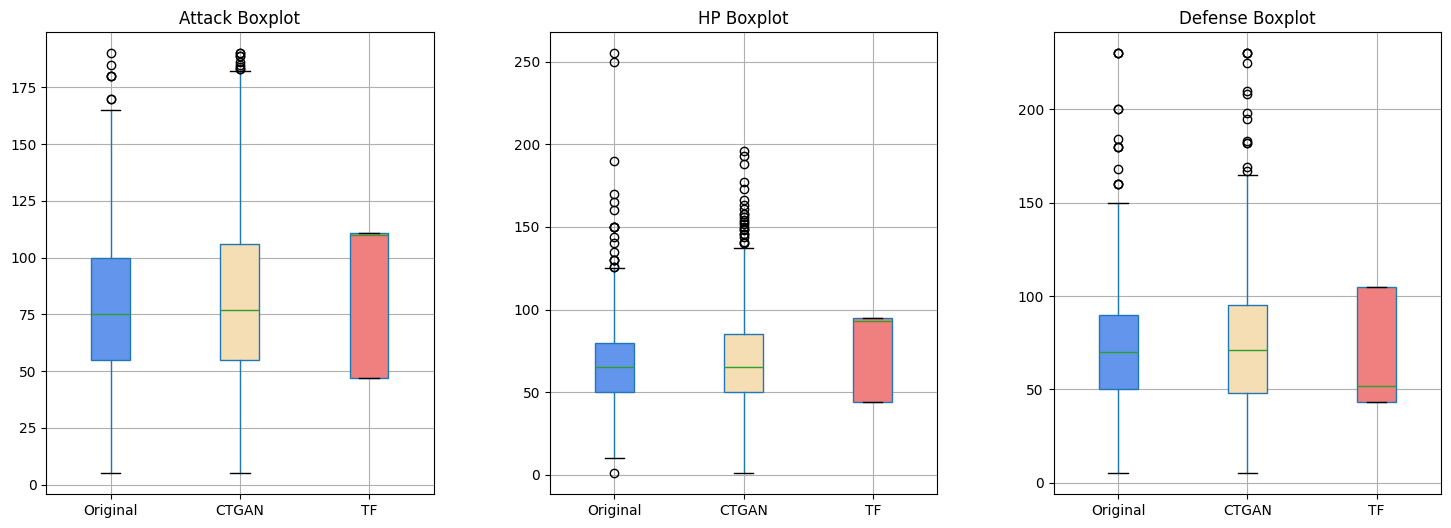

In [209]:
additional_datasets = [df, synthetic_CTGAN, synthetic_tf]
selected_stats = ['Attack', 'HP', 'Defense'] 

# Plot settings
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6)) 
colors = ['cornflowerblue', 'wheat', 'lightcoral']
axes = axes.flatten()
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Plot each specified attribute in its own subplot
for i, stat in enumerate(selected_stats):
    combined_data = pd.concat([ds[stat] for ds in additional_datasets], axis=1)
    combined_data.columns = ['Original', 'CTGAN', 'TF']
    
    # Create the boxplot
    bp = combined_data.boxplot(ax=axes[i], patch_artist=True, return_type='dict')
    
    # Fill with colors
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    axes[i].set_title(stat + ' Boxplot')

plt.show()

In [165]:
def plot_attribute_std_and_median(attribute_name, data_frame):
    """
    Plots the standard deviations and medians of a specified attribute from different datasets side by side.

    Args:
    attribute_name (str): The name of the attribute to plot.
    data_frame (pd.DataFrame): DataFrame containing the standard deviations and medians.
    """
    attribute_std = data_frame[[col for col in data_frame.columns if 'std' in col]].loc[attribute_name]
    attribute_median = data_frame[[col for col in data_frame.columns if 'median' in col]].loc[attribute_name]
    n_pairs = len(attribute_std)
    plt.figure(figsize=(10, 6))
    r = range(n_pairs)
    width = 0.4
    plt.bar(r, attribute_std, color='skyblue', width=width, edgecolor='white', label='Standard Deviation')
    plt.bar([x + width for x in r], attribute_median, color='lightcoral', width=width, edgecolor='white', label='Mean')
    plt.xlabel('Dataset', fontweight='bold')
    plt.xticks([r + width for r in range(n_pairs)], attribute_std.index, rotation=45)
    plt.ylabel(f'{attribute_name} Value')
    plt.title(f'{attribute_name} Standard Deviations and Medians Across Different Datasets')
    plt.legend()
    plt.show()

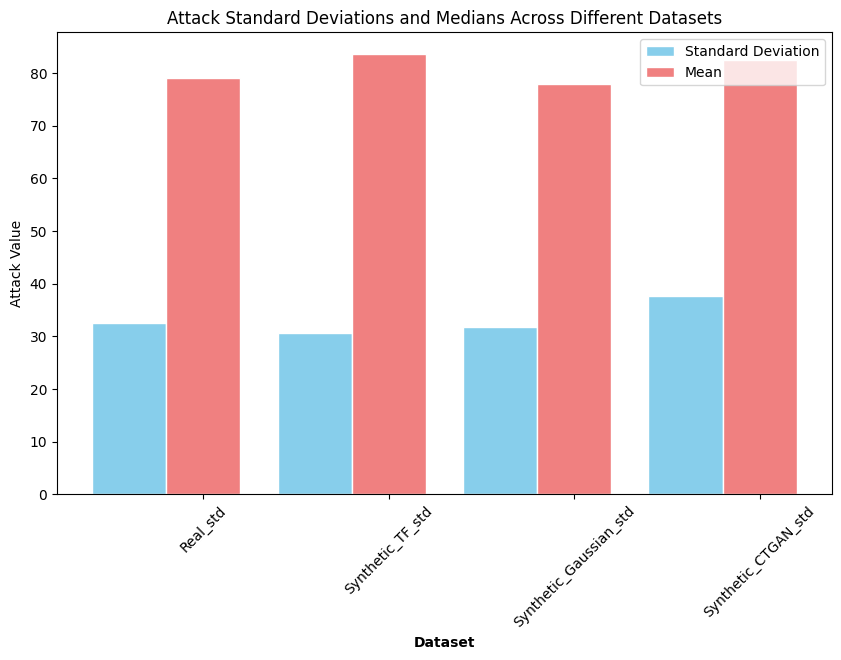

In [166]:
plot_attribute_std_and_median('Attack', combined_df)

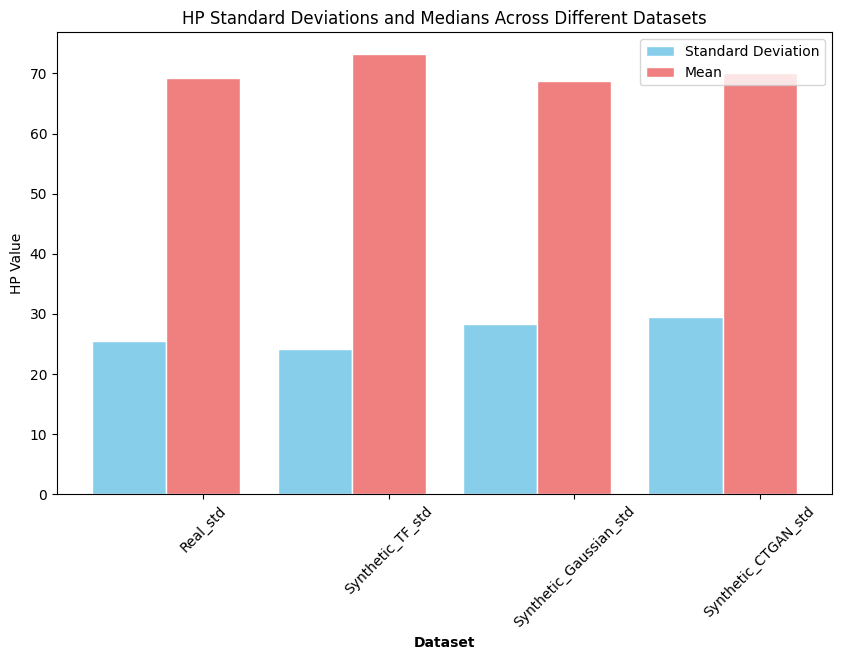

In [167]:
plot_attribute_std_and_median('HP', combined_df)

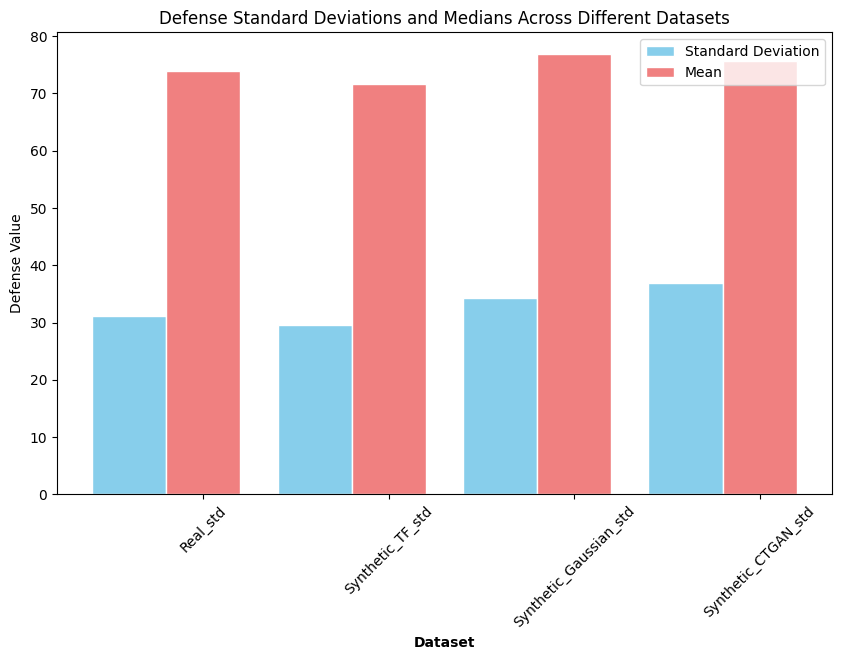

In [168]:
plot_attribute_std_and_median('Defense', combined_df)

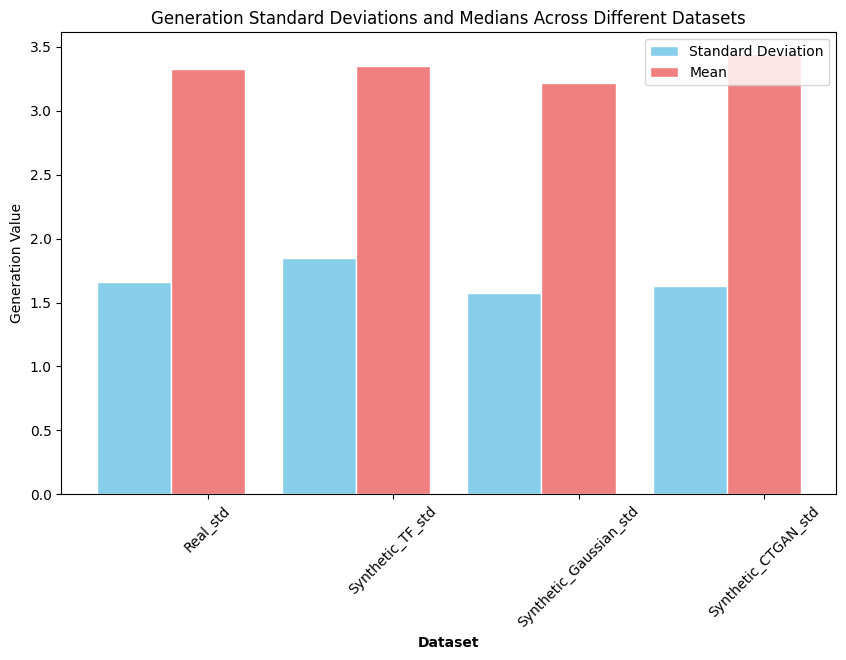

In [169]:
plot_attribute_std_and_median('Generation', combined_df)

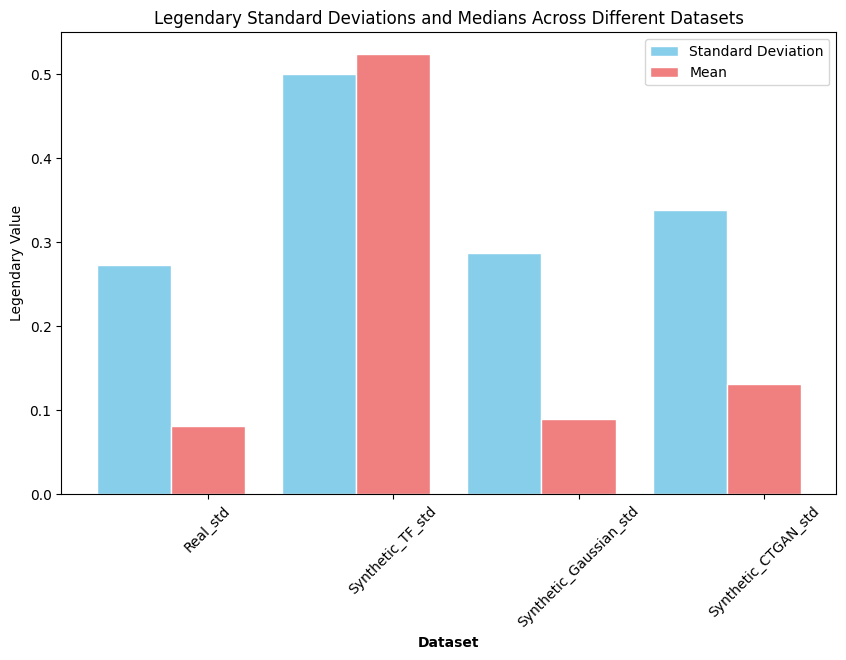

In [170]:
plot_attribute_std_and_median('Legendary', combined_df)

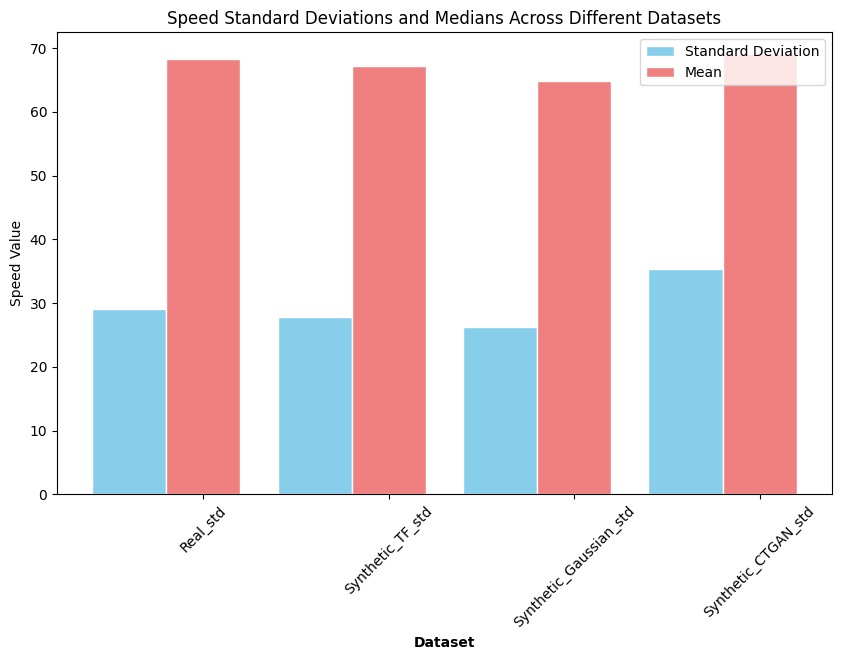

In [171]:
plot_attribute_std_and_median('Speed', combined_df)

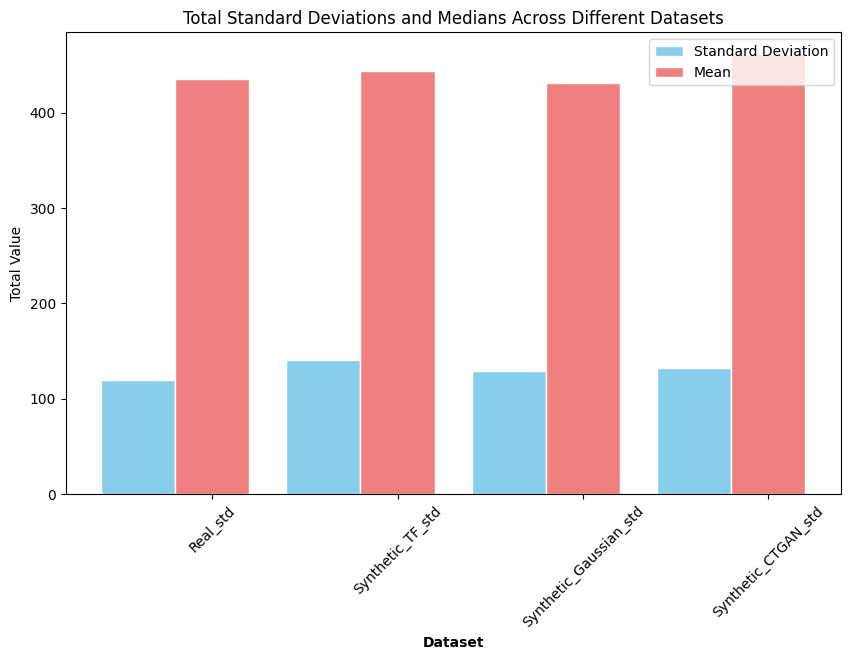

In [172]:
plot_attribute_std_and_median('Total', combined_df)

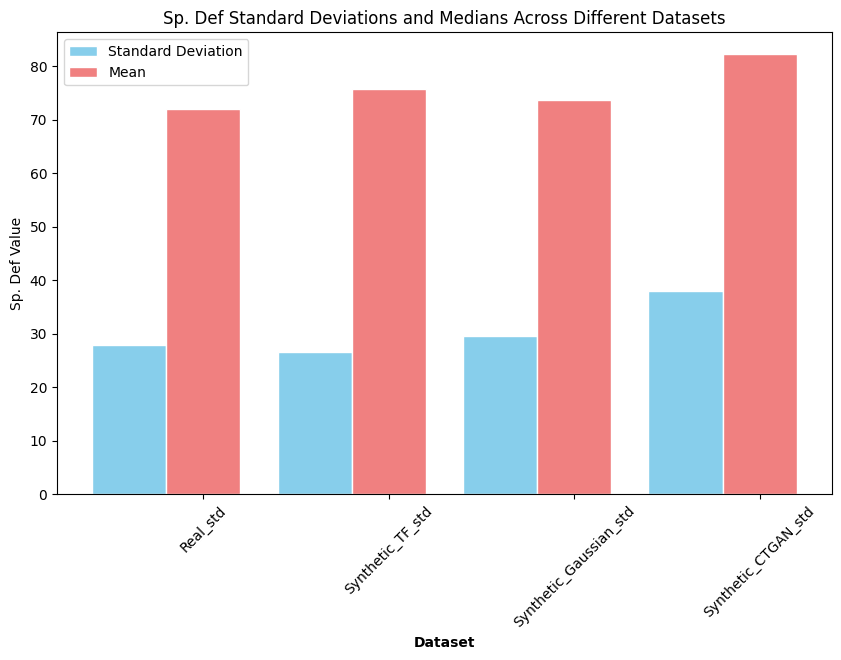

In [173]:
plot_attribute_std_and_median('Sp. Def', combined_df)

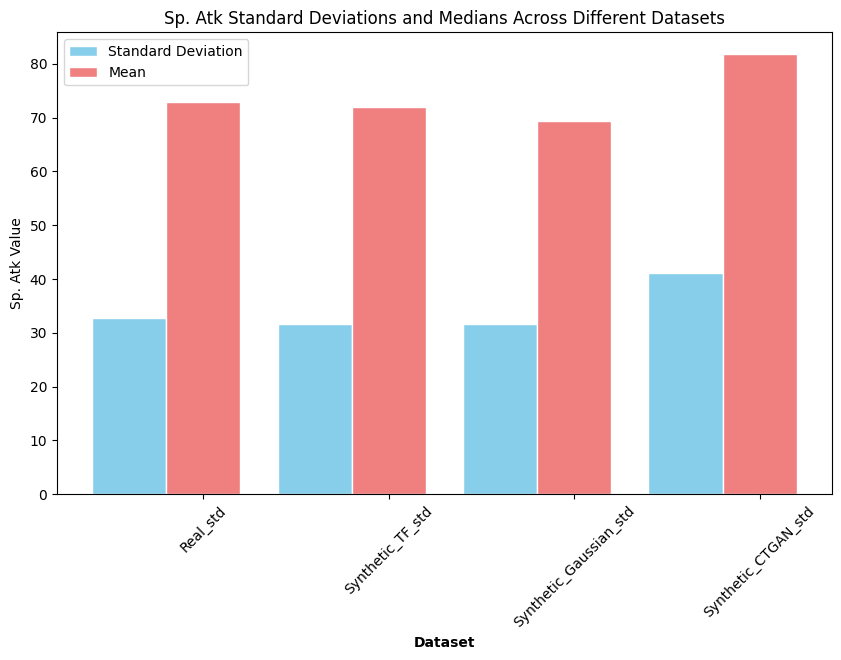

In [174]:
plot_attribute_std_and_median('Sp. Atk', combined_df)

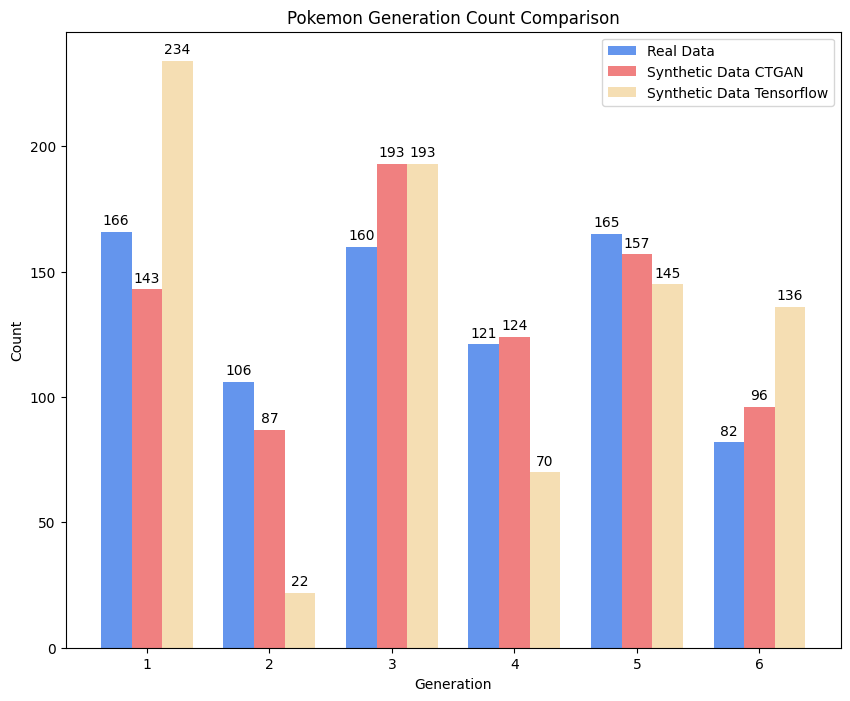

In [175]:
# Generate the counts for each type of data
generation_count_real = df['Generation'].value_counts().sort_index()
generation_count_synthetic = synthetic_CTGAN['Generation'].value_counts().sort_index()
generation_count_synthetic_tf = synthetic_tf['Generation'].value_counts().sort_index()

# Get a sorted union of all unique generations present in the data
all_generations = sorted(set(generation_count_real.index).union(
    set(generation_count_synthetic.index), set(generation_count_synthetic_tf.index)))

# Reindex the counts to include all generations, filling missing values with 0
generation_count_real = generation_count_real.reindex(all_generations, fill_value=0)
generation_count_synthetic = generation_count_synthetic.reindex(all_generations, fill_value=0)
generation_count_synthetic_tf = generation_count_synthetic_tf.reindex(all_generations, fill_value=0)

# Set the width of each bar
bar_width = 0.8

# Define the positions of the bars
index = np.arange(len(all_generations)) * (bar_width * 4)



# Create the bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
real_bars = plt.bar(index, generation_count_real.values, bar_width, label='Real Data', color='cornflowerblue')
ctgan_bars = plt.bar(index + bar_width, generation_count_synthetic.values, bar_width, label='Synthetic Data CTGAN', color='lightcoral')
tf_bars = plt.bar(index + bar_width * 2, generation_count_synthetic_tf.values, bar_width, label='Synthetic Data Tensorflow', color='wheat')

# Add the text labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(real_bars)
add_labels(ctgan_bars)
add_labels(tf_bars)

# Add title and axis labels
plt.title('Pokemon Generation Count Comparison')
plt.xlabel('Generation')
plt.ylabel('Count')

# Set the position of the x-axis ticks to be in the middle of the group of bars
plt.xticks(index + bar_width, all_generations)

# Add a legend
plt.legend()

# Show the plot
plt.show()


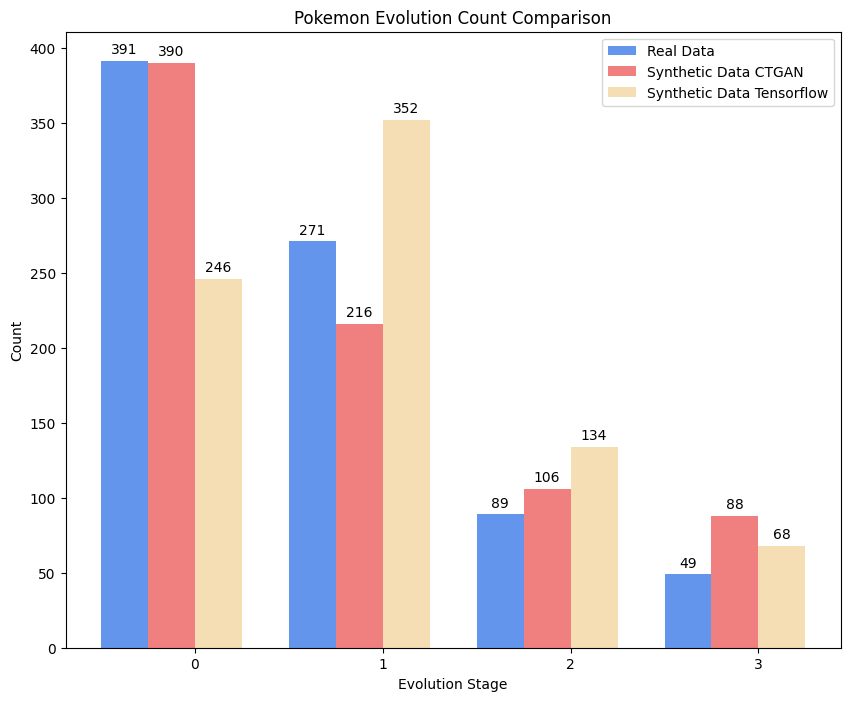

In [176]:
# Generate the counts for each type of data
evolution_count_real = df['Evolution'].value_counts().sort_index()
evolution_count_synthetic = synthetic_CTGAN['Evolution'].value_counts().sort_index()
evolution_count_synthetic_tf = synthetic_tf['Evolution'].value_counts().sort_index()

# Get a sorted union of all unique evolution stages present in the data
all_evolutions = sorted(set(evolution_count_real.index).union(set(evolution_count_synthetic.index), set(evolution_count_synthetic_tf.index)))

# Reindex the counts to include all evolution stages, filling missing values with 0
evolution_count_real = evolution_count_real.reindex(all_evolutions, fill_value=0)
evolution_count_synthetic = evolution_count_synthetic.reindex(all_evolutions, fill_value=0)
evolution_count_synthetic_tf = evolution_count_synthetic_tf.reindex(all_evolutions, fill_value=0)

# Define the positions of the bars
index = np.arange(len(all_evolutions)) * (bar_width * 4)

# Set the width of each bar
bar_width = 0.8

# Create the bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
real_bars = plt.bar(index, evolution_count_real.values, bar_width, label='Real Data', color='cornflowerblue')
ctgan_bars = plt.bar(index + bar_width, evolution_count_synthetic.values, bar_width, label='Synthetic Data CTGAN', color='lightcoral')
tf_bars = plt.bar(index + bar_width * 2, evolution_count_synthetic_tf.values, bar_width, label='Synthetic Data Tensorflow', color='wheat')

# Add the text labels above the bars
def add_labels(bars, offset):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + offset, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(real_bars, bar_width / 2)
add_labels(ctgan_bars, bar_width / 2)
add_labels(tf_bars, bar_width /2)

# Add title and axis labels
plt.title('Pokemon Evolution Count Comparison')
plt.xlabel('Evolution Stage')
plt.ylabel('Count')

# Set the position of the x-axis ticks to be in the middle of the group of bars
plt.xticks(index + bar_width * 1.5, all_evolutions)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [207]:
def Scatterplot(attribute1, attribute2, real, syn_tf, syn_ctgan):
    plt.figure(figsize=(10, 6))
    
    # Scatterplot for real data
    plt.scatter(real[attribute1], real[attribute2], color='cornflowerblue', label='Real Data')
    
    # Scatterplot for synthetic data CTGAN
    plt.scatter(syn_ctgan[attribute1], syn_ctgan[attribute2], color='lightcoral', label='Synthetic Data CTGAN')
    
    # Scatterplot for synthetic data TensorFlow
    plt.scatter(syn_tf[attribute1], syn_tf[attribute2], color='gold', label='Synthetic Data TensorFlow')
    
    # Add title and axis labels based on the attributes being plotted
    plt.title(f'{attribute1} vs. {attribute2} Scatter Plot')
    plt.xlabel(attribute1)
    plt.ylabel(attribute2)
    
    # Add legend
    plt.legend()
    
    # Display the plot
    plt.show()


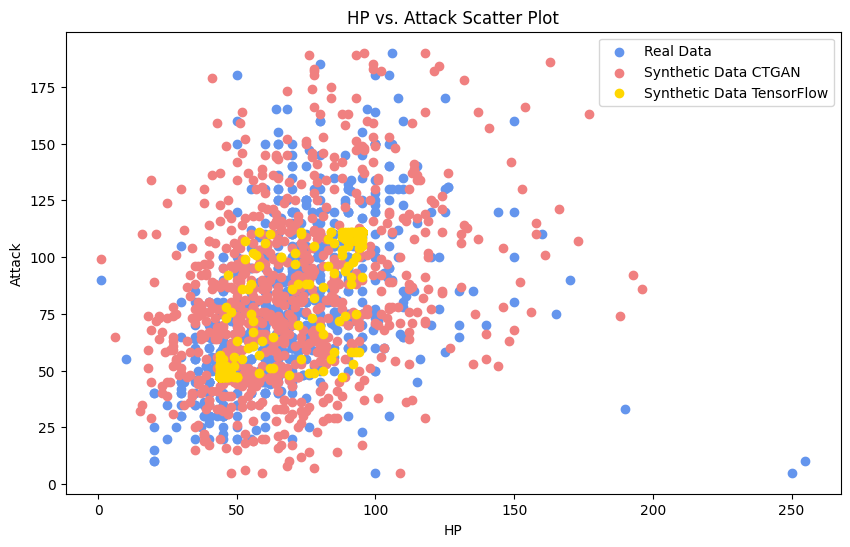

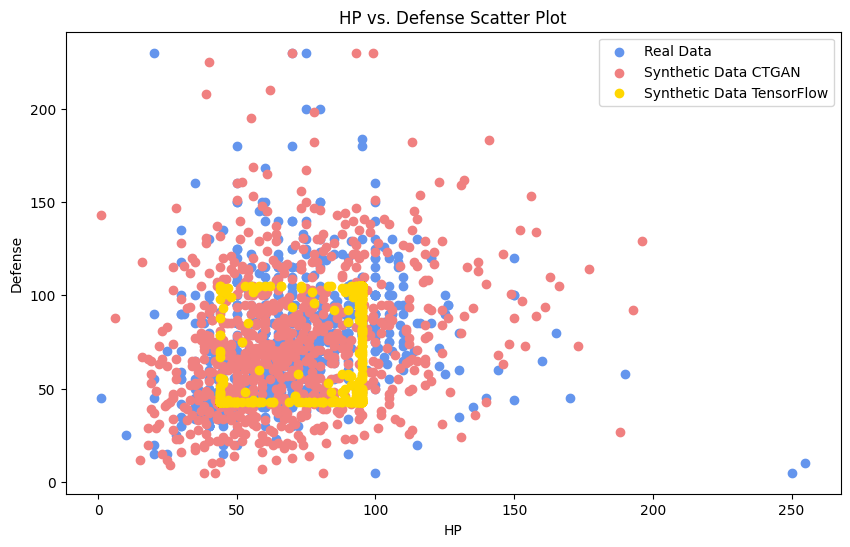

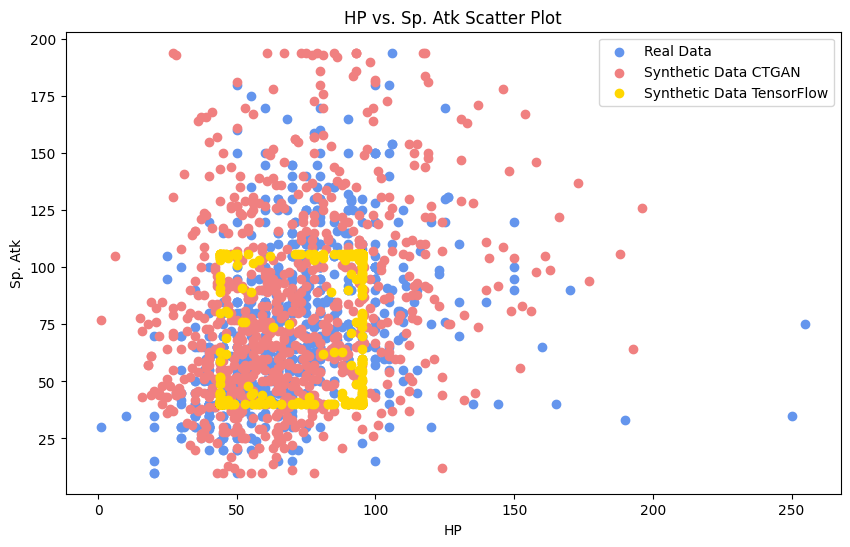

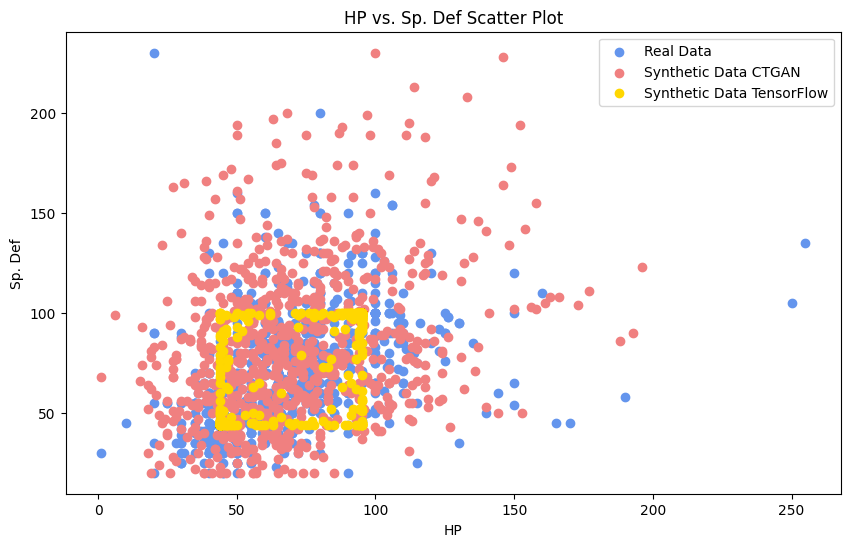

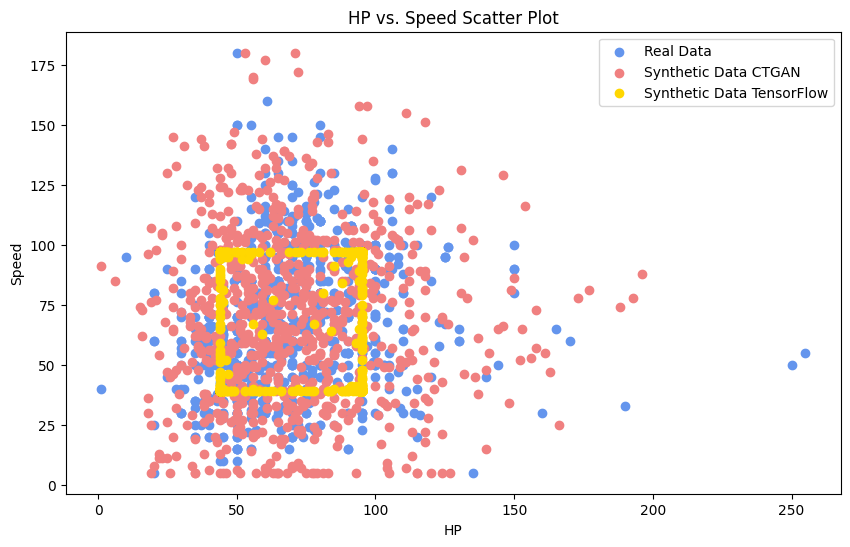

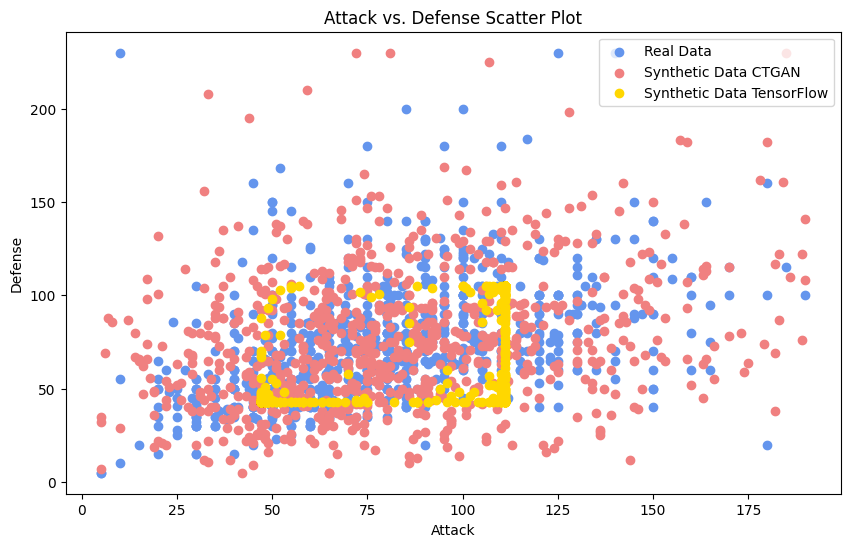

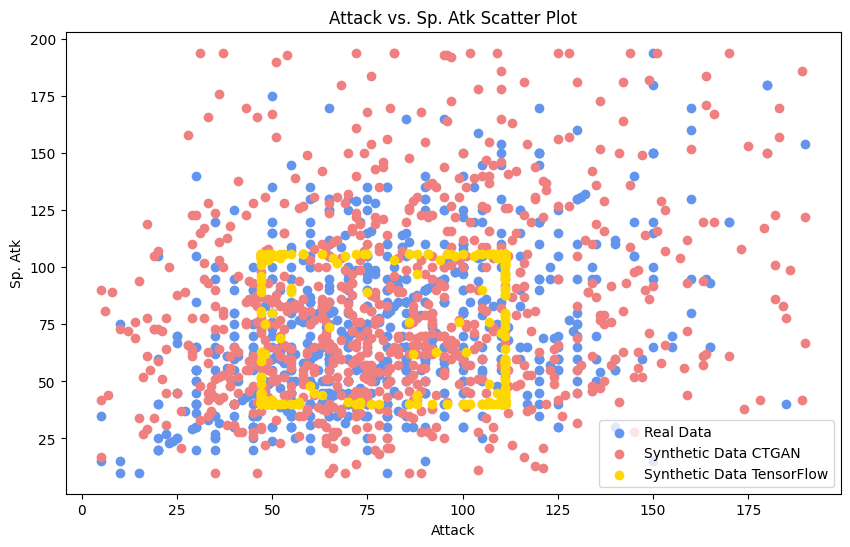

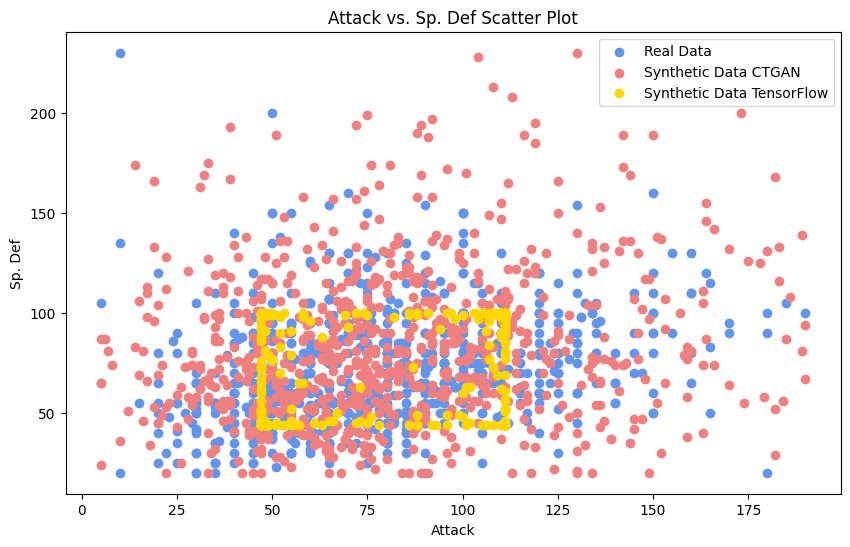

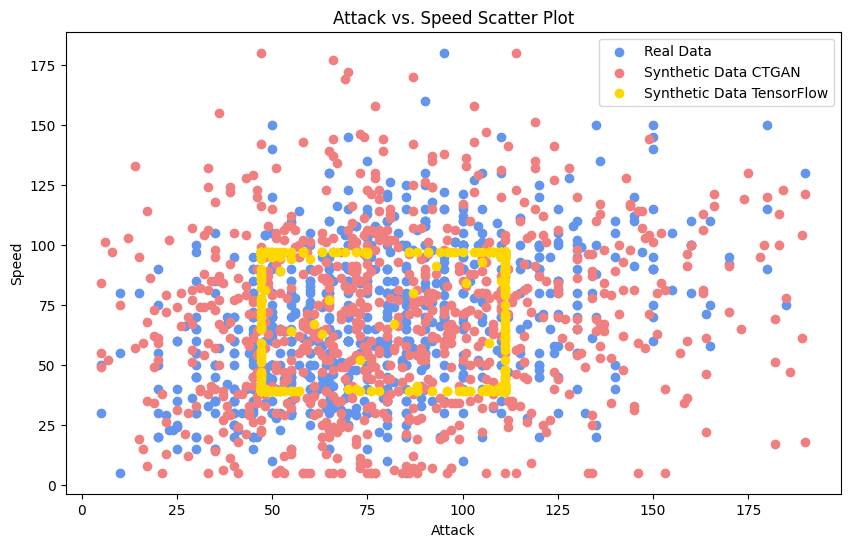

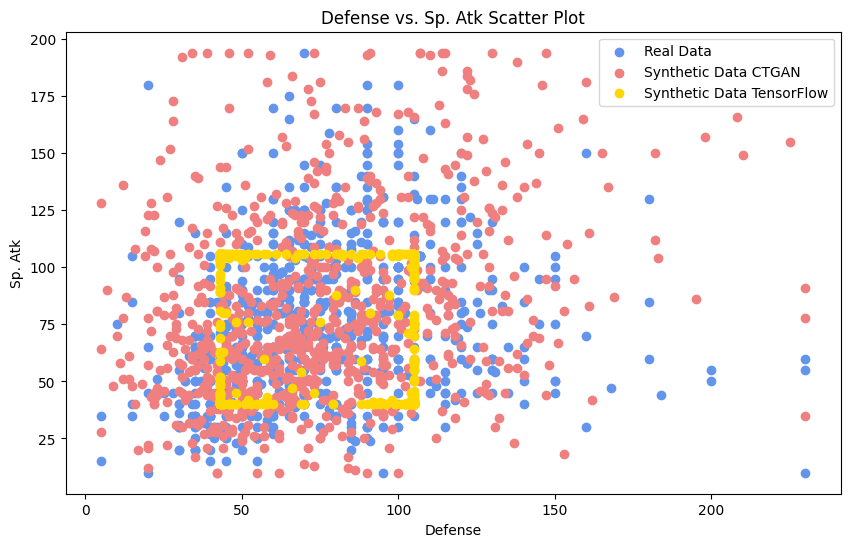

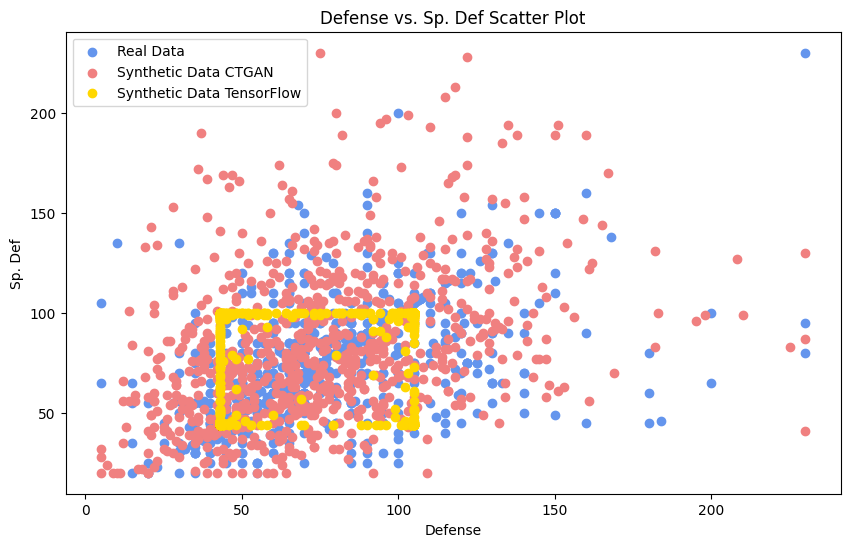

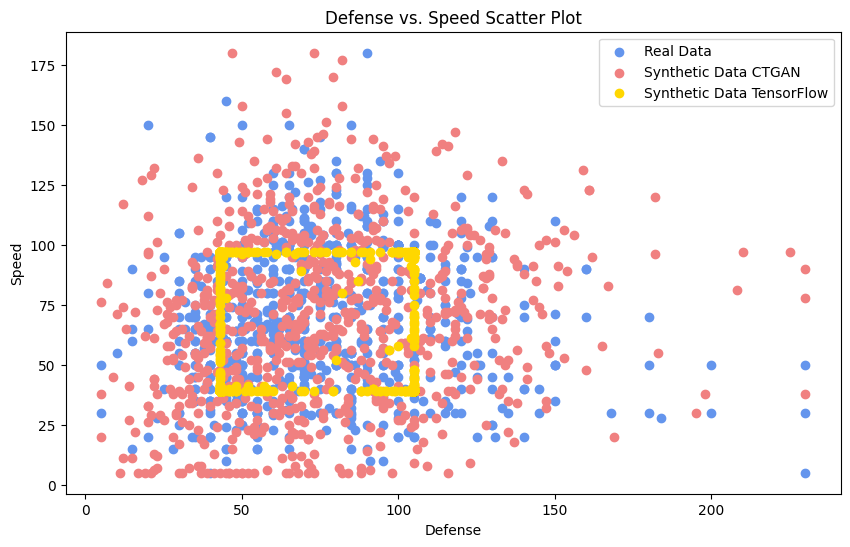

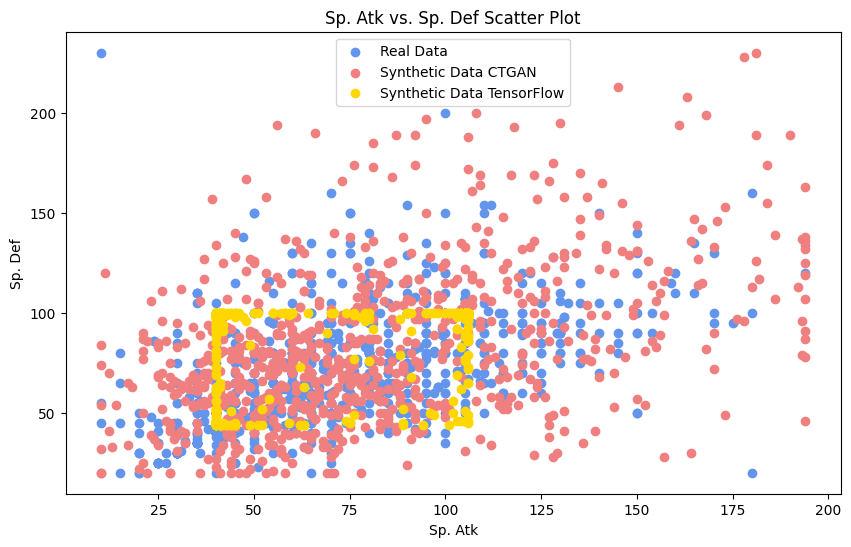

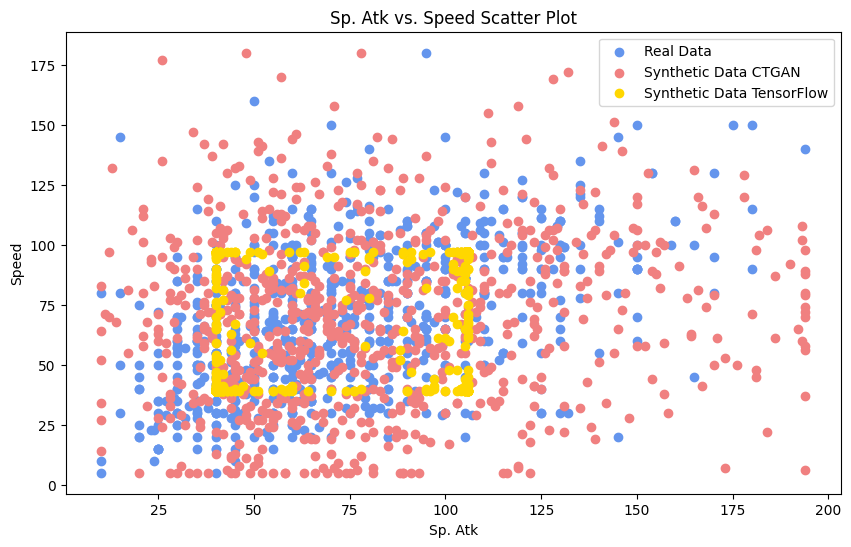

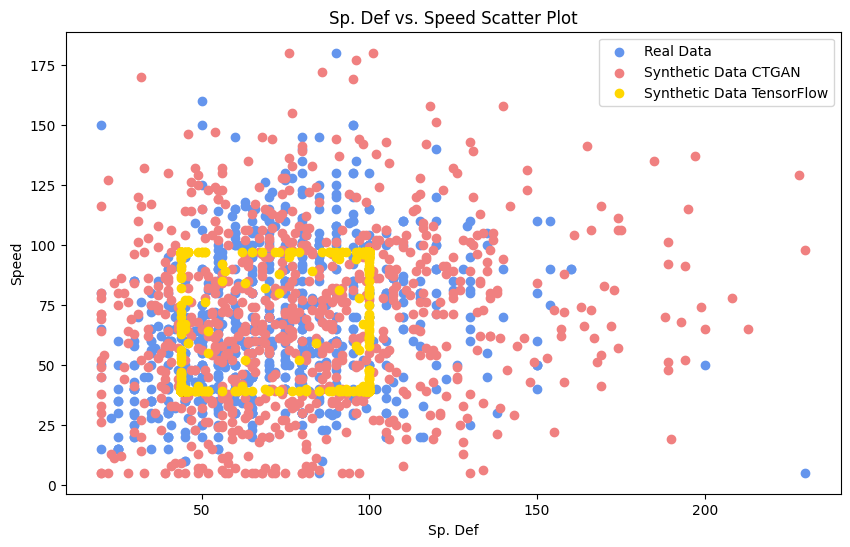

In [208]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Iterate through all unique pairs of features
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        Scatterplot(features[i], features[j], df, synthetic_tf, synthetic_CTGAN)

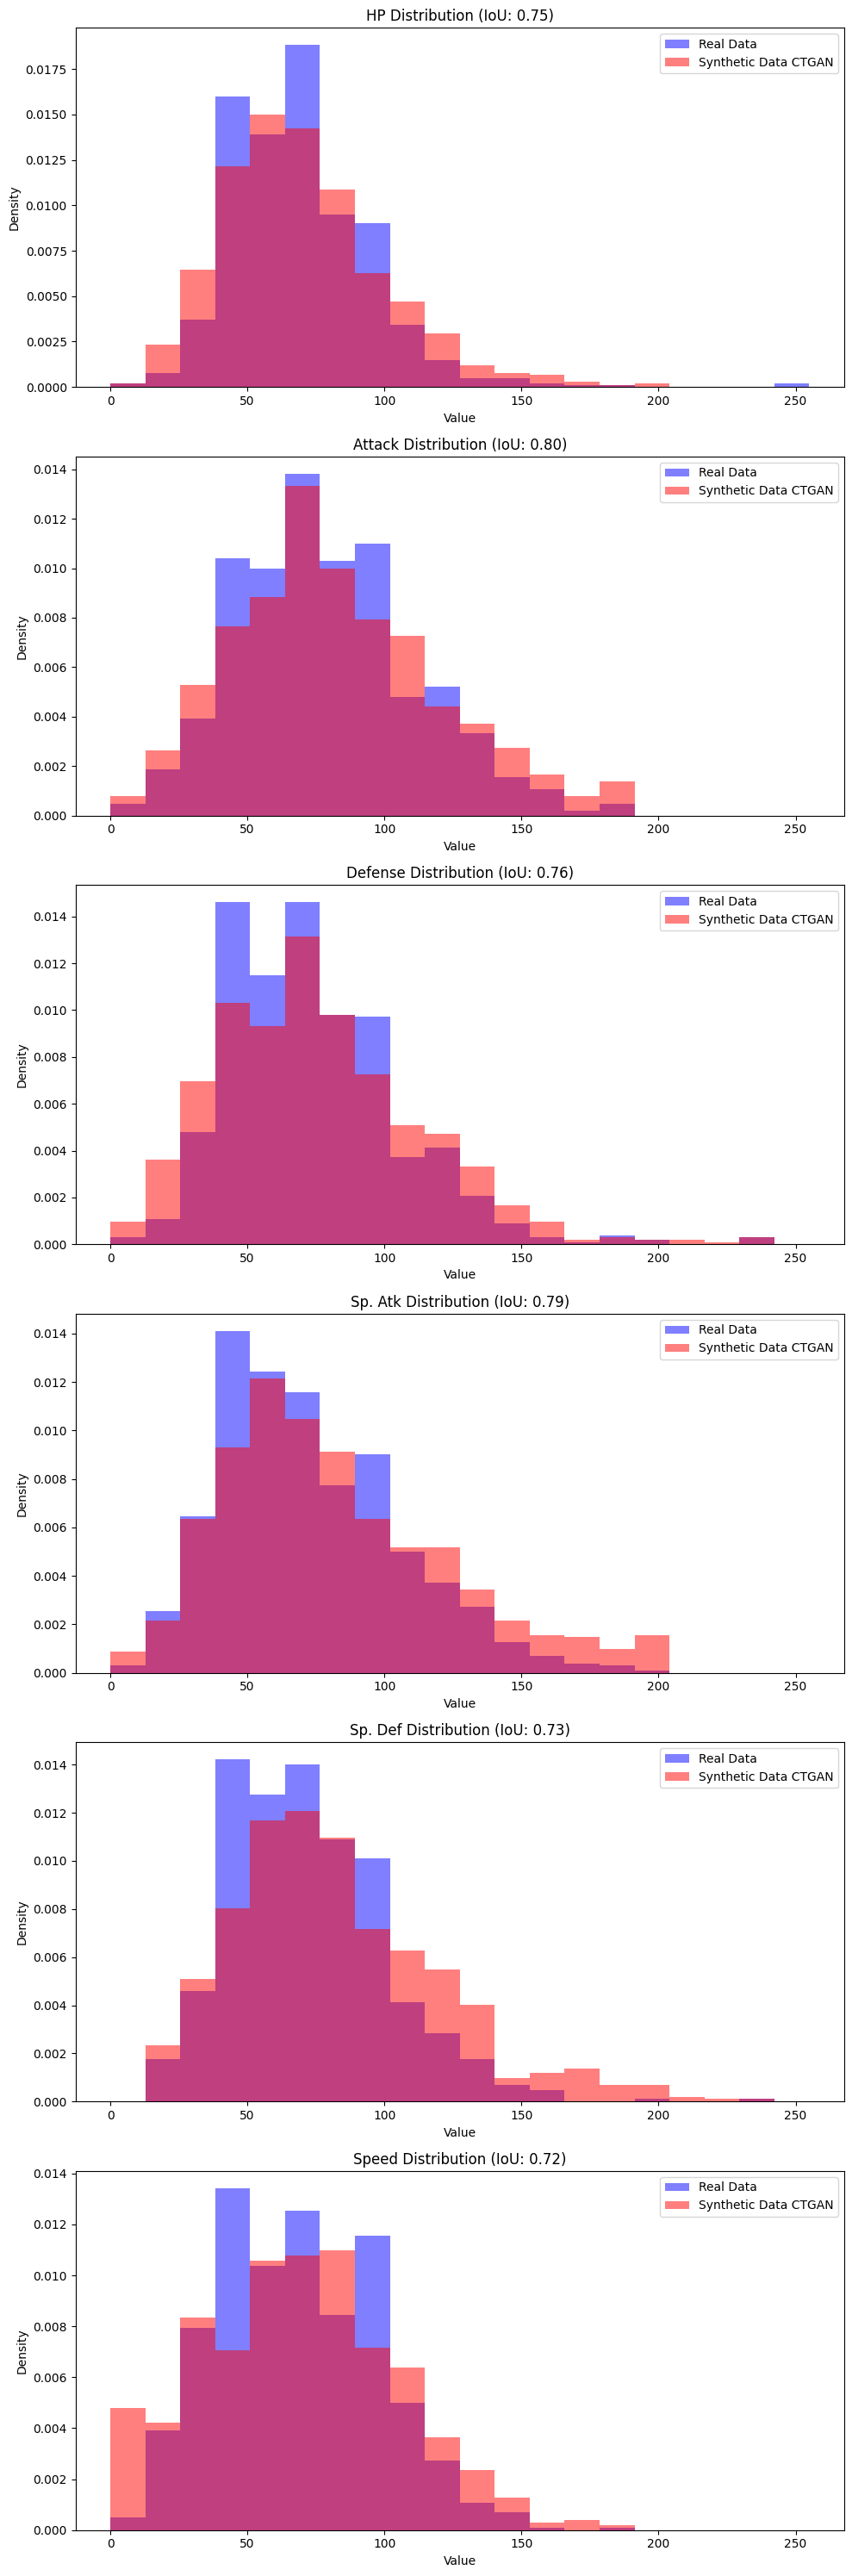

IoU for HP: 0.75
IoU for Attack: 0.80
IoU for Defense: 0.76
IoU for Sp. Atk: 0.79
IoU for Sp. Def: 0.73
IoU for Speed: 0.72


In [179]:
#CTGAN
# List features to compare
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Replace NaN with 'none'
df_non_numeric = df[features].fillna('none')
synthetic_CTGAN_non_numeric = synthetic_CTGAN[features].fillna('none')

# Fill Nan with 0
df_numeric = df[features].fillna(0)
synthetic_CTGAN_numeric = synthetic_CTGAN[features].fillna(0)

# Define Bins
bins = np.linspace(0, max(df_numeric.max().max(), synthetic_CTGAN_numeric.max().max()), 21)

# Generate IoU and Histogram
iou_scores = []
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 5 * len(features)))

for i, feature in enumerate(features):
    real_hist, _ = np.histogram(df_numeric[feature], bins=bins, density=True)
    synthetic_hist, _ = np.histogram(synthetic_CTGAN_numeric[feature], bins=bins, density=True)
    intersection = np.minimum(real_hist, synthetic_hist).sum()
    union = np.maximum(real_hist, synthetic_hist).sum()
    iou = intersection / union
    iou_scores.append(iou)

    axes[i].hist(df_numeric[feature], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
    axes[i].hist(synthetic_CTGAN_numeric[feature], bins=bins, alpha=0.5, label='Synthetic Data CTGAN', color='red', density=True)
    axes[i].set_title(f'{feature} Distribution (IoU: {iou:.2f})')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print IoU for every Feature
for feature, score in zip(features, iou_scores):
    print(f'IoU for {feature}: {score:.2f}')


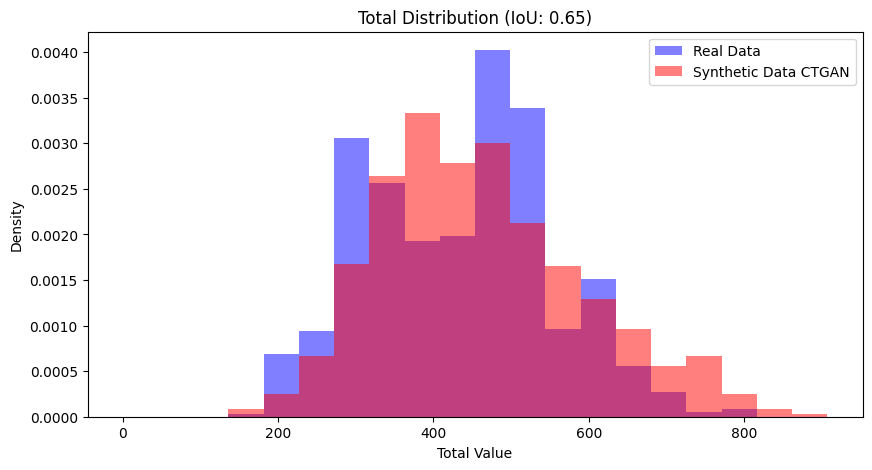

IoU for Total: 0.65


In [180]:
# Define Bins
bins = np.linspace(0, max(df["Total"].max(), synthetic_CTGAN["Total"].max()), 21)

# Calculate Histogram and IoU
real_hist, _ = np.histogram(df["Total"], bins=bins, density=True)
synthetic_hist, _ = np.histogram(synthetic_CTGAN["Total"], bins=bins, density=True)

intersection = np.minimum(real_hist, synthetic_hist).sum()
union = np.maximum(real_hist, synthetic_hist).sum()
iou = intersection / union

# Plotting
plt.figure(figsize=(10, 5))
plt.hist(df["Total"], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
plt.hist(synthetic_CTGAN["Total"], bins=bins, alpha=0.5, label='Synthetic Data CTGAN', color='red', density=True)
plt.title(f'Total Distribution (IoU: {iou:.2f})')
plt.xlabel('Total Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# print IoU
print(f'IoU for Total: {iou:.2f}')


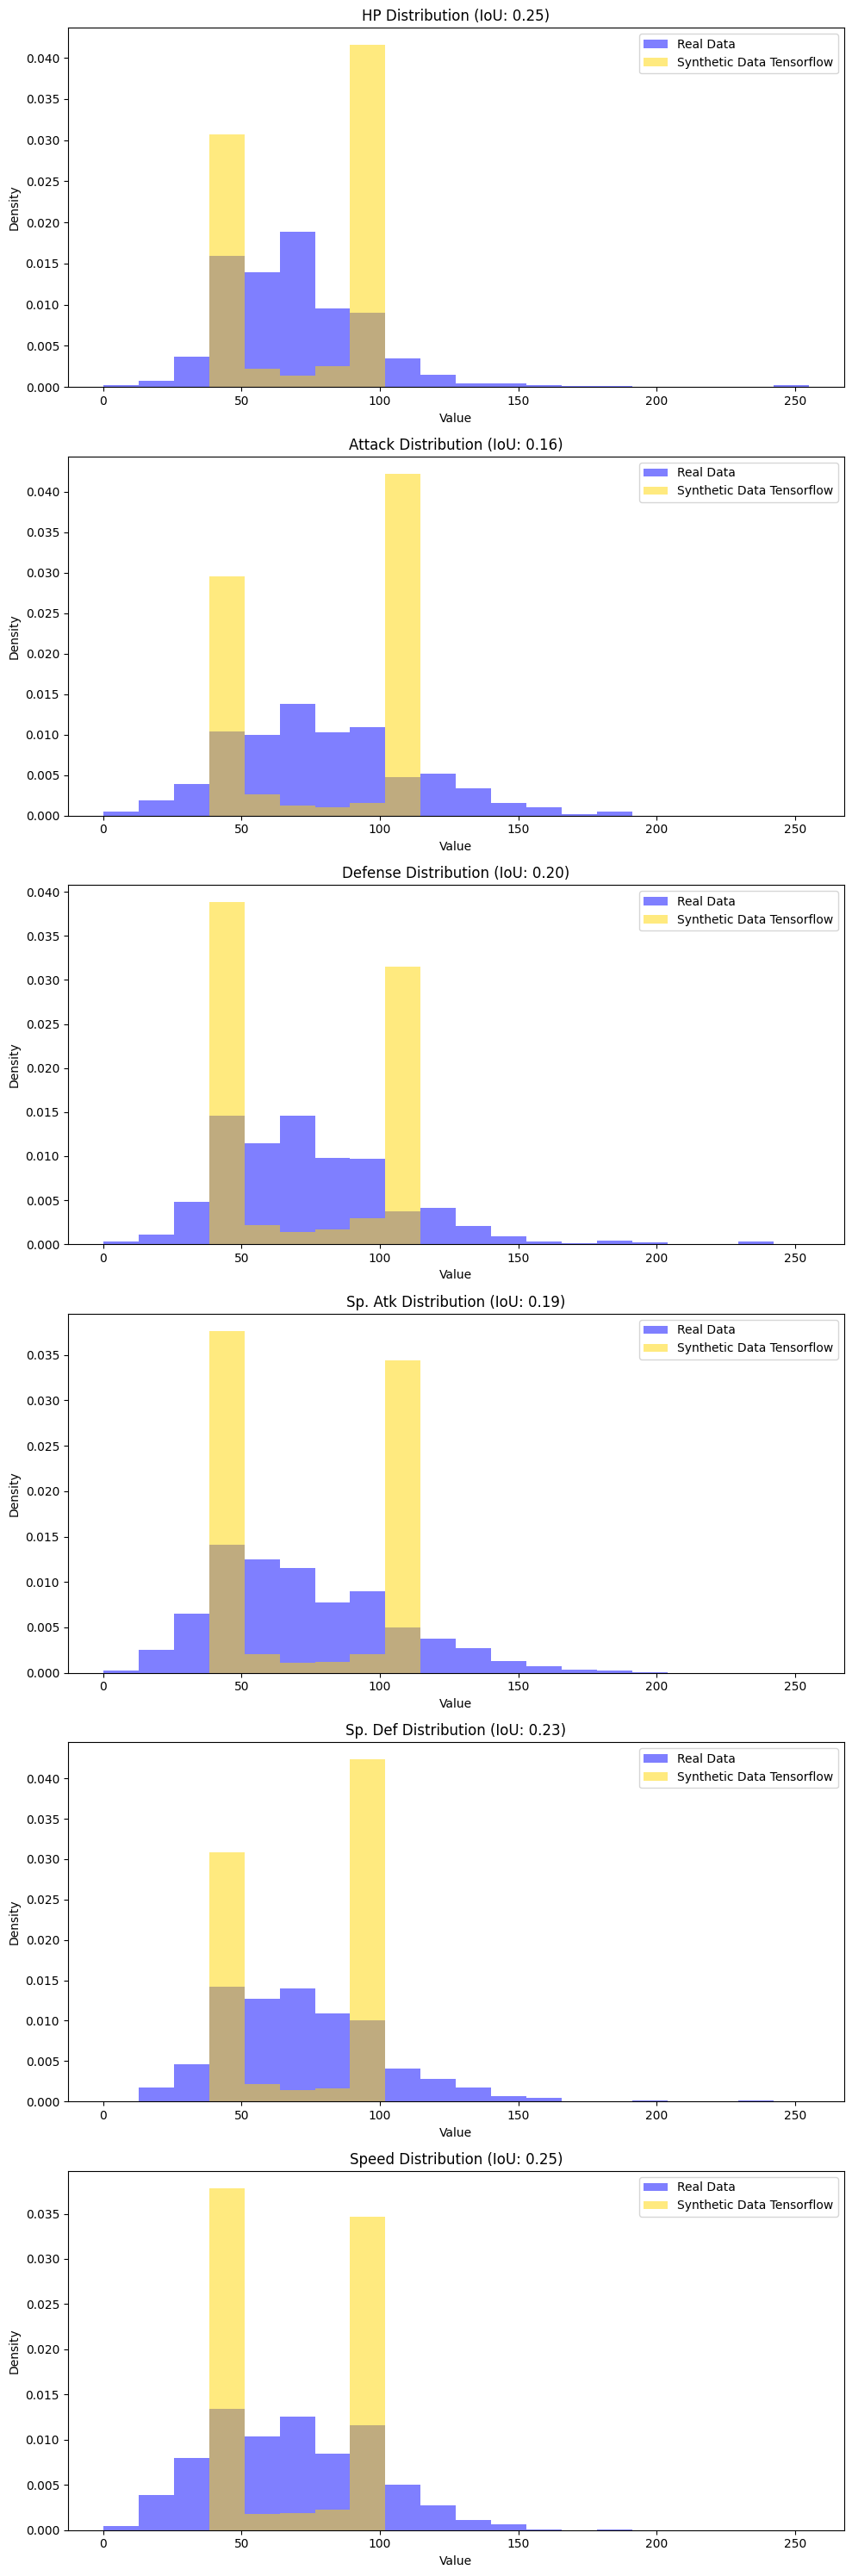

IoU for HP: 0.25
IoU for Attack: 0.16
IoU for Defense: 0.20
IoU for Sp. Atk: 0.19
IoU for Sp. Def: 0.23
IoU for Speed: 0.25


In [181]:
# TF
# List features to compare
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Replace NaN with 'none'
df_non_numeric = df[features].fillna('none')
synthetic_CTGAN_non_numeric = synthetic_tf[features].fillna('none')

# Fill Nan with 0
df_numeric = df[features].fillna(0)
synthetic_tf_numeric = synthetic_tf[features].fillna(0)

# Define Bins
bins = np.linspace(0, max(df_numeric.max().max(), synthetic_tf_numeric.max().max()), 21)

# Generate IoU and Histogram
iou_scores = []
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 5 * len(features)))

for i, feature in enumerate(features):
    real_hist, _ = np.histogram(df_numeric[feature], bins=bins, density=True)
    synthetic_hist, _ = np.histogram(synthetic_tf_numeric[feature], bins=bins, density=True)
    intersection = np.minimum(real_hist, synthetic_hist).sum()
    union = np.maximum(real_hist, synthetic_hist).sum()
    iou = intersection / union
    iou_scores.append(iou)

    axes[i].hist(df_numeric[feature], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
    axes[i].hist(synthetic_tf_numeric[feature], bins=bins, alpha=0.5, label='Synthetic Data Tensorflow', color='gold', density=True)
    axes[i].set_title(f'{feature} Distribution (IoU: {iou:.2f})')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print IoU for every Feature
for feature, score in zip(features, iou_scores):
    print(f'IoU for {feature}: {score:.2f}')


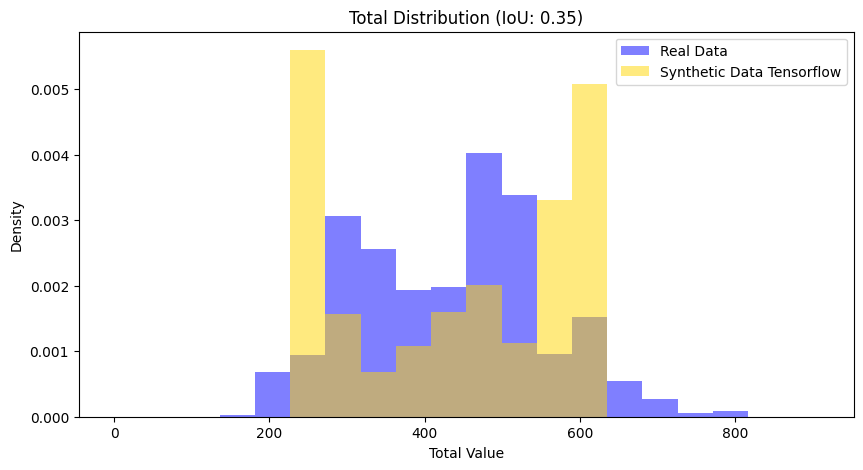

IoU for Total: 0.35


In [182]:
# TF
# Define Bins
bins = np.linspace(0, max(df["Total"].max(), synthetic_CTGAN["Total"].max()), 21)

# Calculate Histogram and IoU
real_hist, _ = np.histogram(df["Total"], bins=bins, density=True)
synthetic_hist, _ = np.histogram(synthetic_tf["Total"], bins=bins, density=True)

intersection = np.minimum(real_hist, synthetic_hist).sum()
union = np.maximum(real_hist, synthetic_hist).sum()
iou = intersection / union

# Plotting
plt.figure(figsize=(10, 5))
plt.hist(df["Total"], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
plt.hist(synthetic_tf["Total"], bins=bins, alpha=0.5, label='Synthetic Data Tensorflow', color='gold', density=True)
plt.title(f'Total Distribution (IoU: {iou:.2f})')
plt.xlabel('Total Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# print IoU
print(f'IoU for Total: {iou:.2f}')


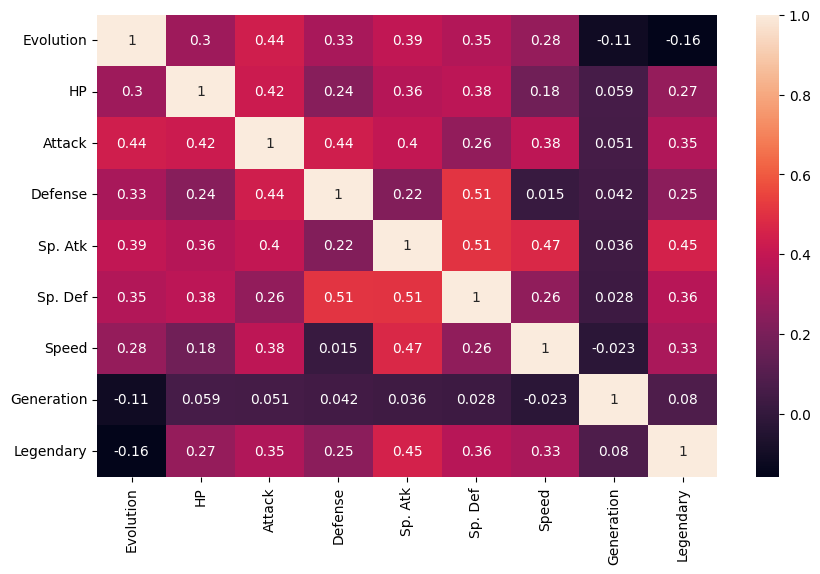

In [183]:
plt.figure(figsize=(10,6))
df_heatmap = df[["Evolution", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr()
sns.heatmap(df[["Evolution", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

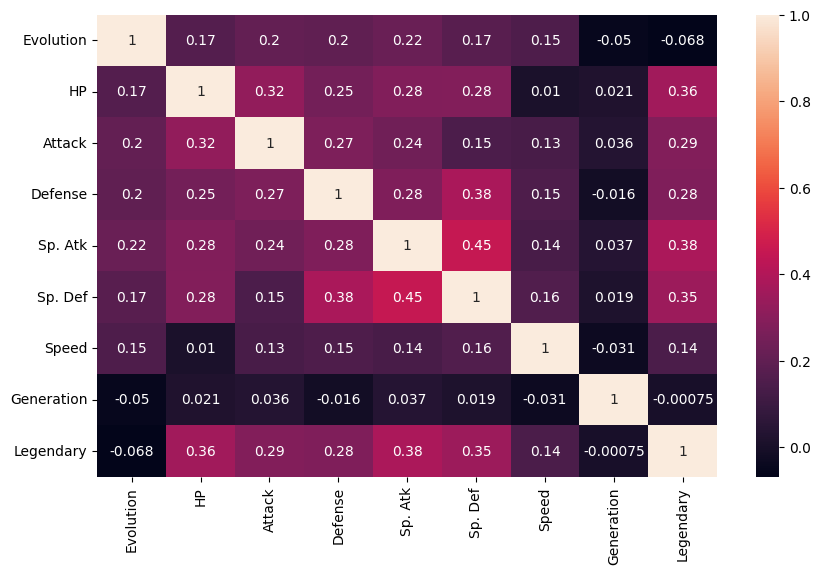

In [184]:
plt.figure(figsize=(10,6))
synthetic_CTGAN_heatmap = synthetic_CTGAN[["Evolution", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr()
sns.heatmap(synthetic_CTGAN[["Evolution", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

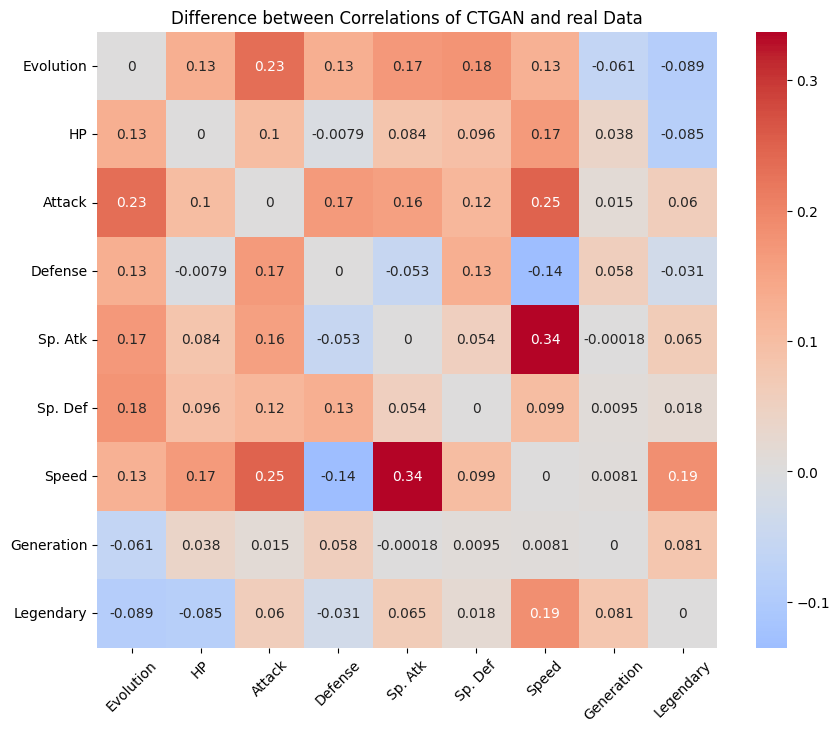

In [185]:
diff_matrix = df_heatmap - synthetic_CTGAN_heatmap
fig, ax = plt.subplots(figsize=(10, 8))


sns.heatmap(diff_matrix, annot=True, ax=ax, cmap='coolwarm', center=0)
ax.set_title('Difference between Correlations of CTGAN and real Data')

ax.set_xticklabels(['Evolution', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'], rotation=45)
ax.set_yticklabels(['Evolution', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'], rotation=0)


plt.show()

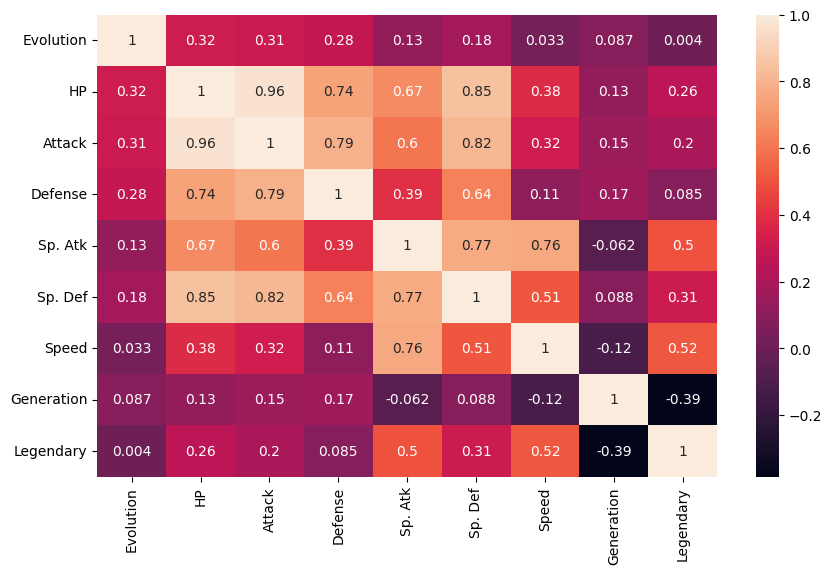

In [186]:
plt.figure(figsize=(10,6))
synthetic_tf_heatmap = synthetic_tf[["Evolution", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr()
sns.heatmap(synthetic_tf[["Evolution", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

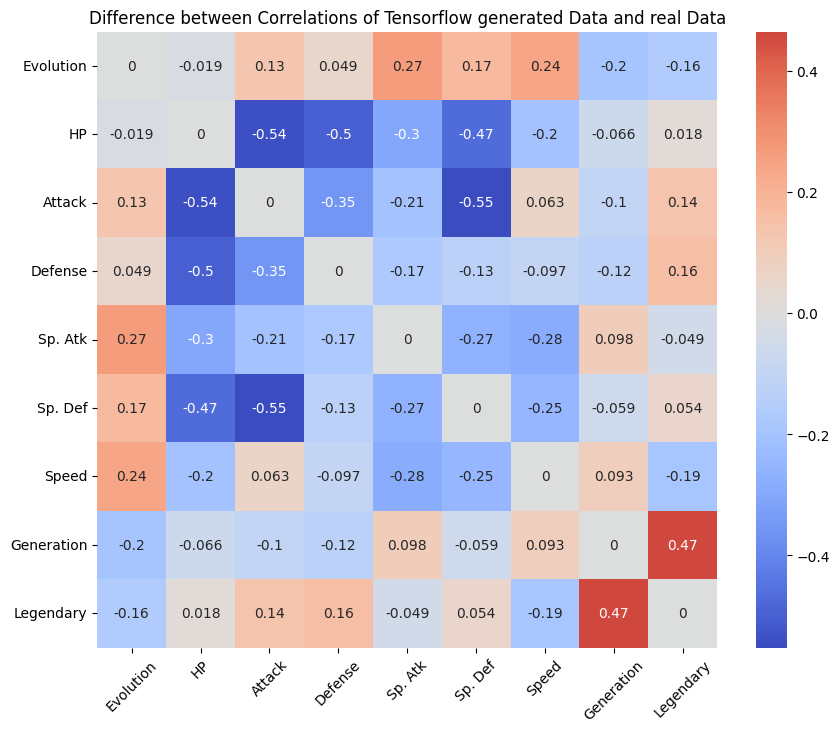

In [187]:
diff_matrix = df_heatmap - synthetic_tf_heatmap
fig, ax = plt.subplots(figsize=(10, 8))


sns.heatmap(diff_matrix, annot=True, ax=ax, cmap='coolwarm', center=0)
ax.set_title('Difference between Correlations of Tensorflow generated Data and real Data')

ax.set_xticklabels(['Evolution', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'], rotation=45)
ax.set_yticklabels(['Evolution', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'], rotation=0)


plt.show()

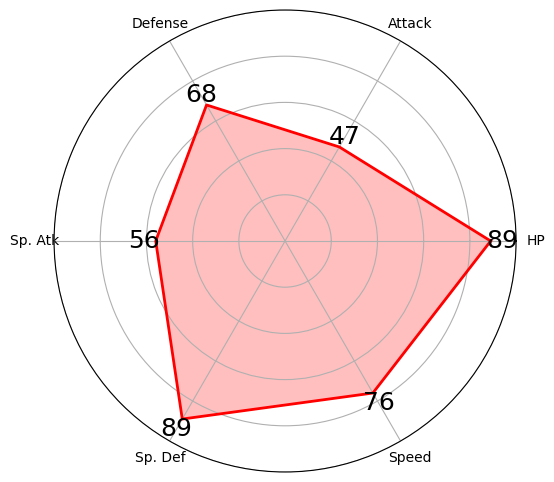

In [206]:
# Pokémon-Werte
values = [89, 47, 68, 56, 89, 76]
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Anzahl der Variablen
num_vars = len(values)

# Winkel berechnen, an denen die Werte in der Grafik erscheinen
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Die Grafik soll rund sein, also verbinden Sie das Ende mit dem Anfang
values += values[:1]
angles += angles[:1]

# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Linien zeichnen
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=2)  # Linienfarbe und -dicke

# Achsenbeschriftungen
ax.set_yticks([20, 40, 60, 80, 100])  # Zum Beispiel Skalierung für bessere Visualisierung
ax.set_yticklabels([])

# Spaltennamen als Achsenbeschriftungen
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Werte unter den Achsenbeschriftungen anzeigen
for angle, value, attribute in zip(angles[:-1], values[:-1], attributes):
    ax.text(angle, value + 5, f'{value}', ha='center', va='center', fontsize=18, color='black')

# Titel setzen
plt.title('', size=20, color='Green', y=1.1)

# Diagramm anzeigen
plt.show()
